<div style="font-size:18pt; padding-top:20px; text-align:center">СЕМИНАР 14. <b>Кластеризация и </b> <span style="font-weight:bold; color:green">NumPy/SciPy/Sklearn</span></div><hr>
<div style="text-align:right;">Папулин С.Ю. <span style="font-style: italic;font-weight: bold;">(papulin_hse@mail.ru)</span></div>

<a name="0"></a>
<div><span style="font-size:14pt; font-weight:bold">Содержание</span>
    <ol>
        <li><a href="#1">Метод k-средних (KMeans)</a></li>
        <li><a href="#2">Иерархическая кластеризация (Agglomerative Clustering)</a></li>
        <li><a href="#3">Кластеризция по плотности (DBSCAN)</a>
        <li><a href="#4">Источники</a>
        </li>
    </ol>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.datasets import make_blobs

%matplotlib inline

In [2]:
from matplotlib.colors import ListedColormap

In [3]:
clrMap = ListedColormap(["blue", "red", "green", "yellow", "purple"])

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Генерация данных</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

In [4]:
from sklearn import datasets

In [5]:
n = 500

In [6]:
cl_class = datasets.make_classification(n_samples=n, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=2,
                           random_state=1234)

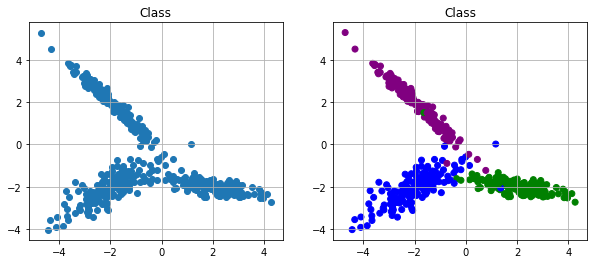

In [7]:
plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
plt.title("Class")
plt.scatter(cl_class[0][:,0], cl_class[0][:,1])
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Class")
plt.scatter(cl_class[0][:,0], cl_class[0][:,1], c=cl_class[1], cmap=clrMap)
plt.grid(True)

plt.show()

In [8]:
cl_blobs = datasets.make_blobs(n_samples=n, random_state=1000)

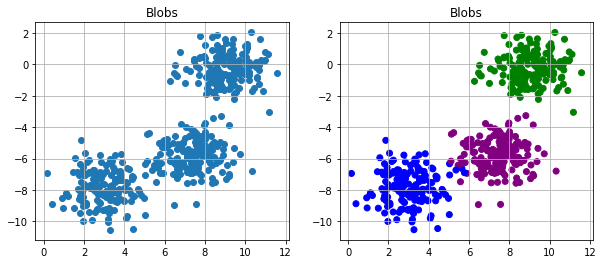

In [9]:
plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
plt.title("Blobs")
plt.scatter(cl_blobs[0][:,0], cl_blobs[0][:,1])
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Blobs")
plt.scatter(cl_blobs[0][:,0], cl_blobs[0][:,1], c=cl_blobs[1], cmap=clrMap)
plt.grid(True)

plt.show()

In [10]:
cl_moons = datasets.make_moons(n_samples=n, noise=0.1)

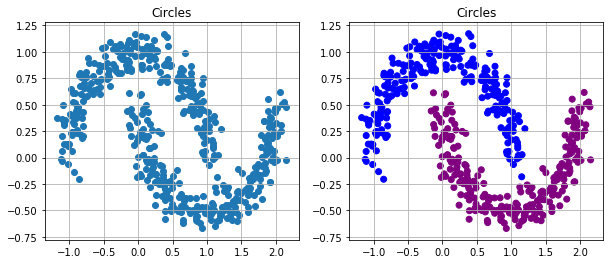

In [11]:
plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
plt.title("Circles")
plt.scatter(cl_moons[0][:,0], cl_moons[0][:,1])
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Circles")
plt.scatter(cl_moons[0][:,0], cl_moons[0][:,1], c=cl_moons[1], cmap=clrMap)
plt.grid(True)

plt.show()

In [12]:
cl_circles = datasets.make_circles(n_samples=n, factor=0.1, noise=0.1)

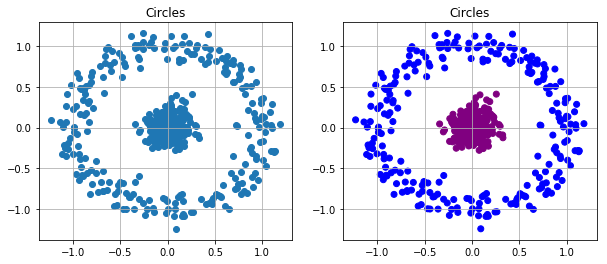

In [13]:
plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
plt.title("Circles")
plt.scatter(cl_circles[0][:,0], cl_circles[0][:,1])
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Circles")
plt.scatter(cl_circles[0][:,0], cl_circles[0][:,1], c=cl_circles[1], cmap=clrMap)
plt.grid(True)

plt.show()

In [14]:
rand = np.random.rand(n, 2), None

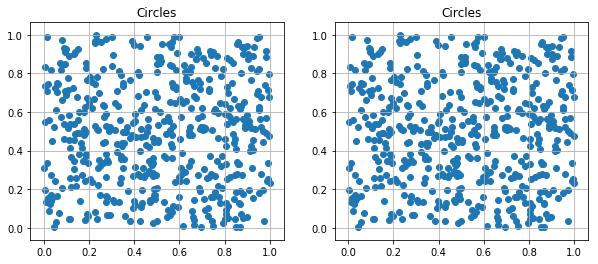

In [15]:
plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
plt.title("Circles")
plt.scatter(rand[0][:,0], rand[0][:,1])
plt.grid(True)

plt.subplot(1,2,2)
plt.title("Circles")
plt.scatter(rand[0][:,0], rand[0][:,1], c=rand[1], cmap=clrMap)
plt.grid(True)

plt.show()

<a name="1"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">1. Метод k-средних</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<p><a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">KMeans</a></p>

In [16]:
n = 1000
random_state = 100
X, y = make_blobs(n_samples=n, centers=3, cluster_std=1, center_box=(-5, 5), random_state=random_state)

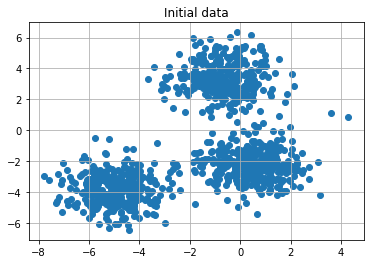

In [17]:
plt.title("Initial data")
plt.scatter(X[:, 0], X[:, 1])
plt.grid(True)
plt.show()

In [18]:
kM_cl = KMeans(n_clusters=3, max_iter=300, init="random", random_state=10, n_init=1)

In [19]:
kM_cl.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=10, tol=0.0001, verbose=0)

In [20]:
kM_cl.inertia_

2093.9506222590953

In [21]:
y_pred = kM_cl.predict(X)

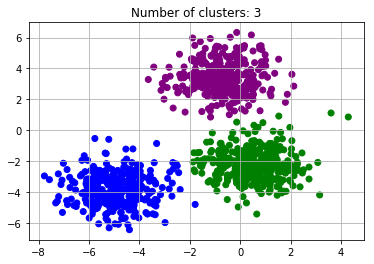

In [22]:
plt.title("Number of clusters: 3")
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=clrMap)
plt.grid(True)
plt.show()

In [23]:
y_pred = KMeans(n_clusters=3, max_iter=1, init="random", random_state=100, n_init=1).fit_predict(X)

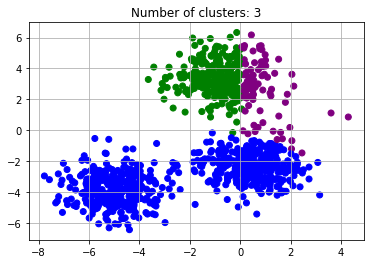

In [25]:
plt.title("Number of clusters: 3")
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=clrMap)
plt.grid(True)
plt.show()

In [26]:
y_pred = KMeans(n_clusters=2, random_state=10, n_init=1).fit_predict(X)

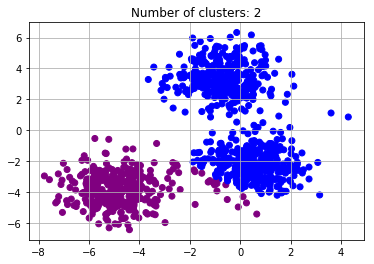

In [27]:
plt.title("Number of clusters: 2")
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=clrMap)
plt.grid(True)
plt.show()

In [28]:
y_pred = KMeans(n_clusters=5, random_state=10, n_init=1).fit_predict(X)

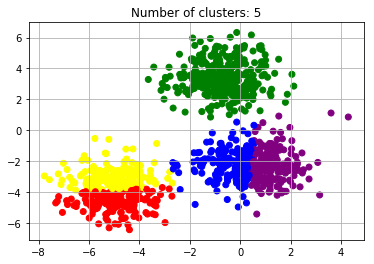

In [30]:
plt.title("Number of clusters: 5")
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=clrMap)
plt.grid(True)
plt.show()

<p>Примеры</p>

In [31]:
n = 500

In [32]:
X, y = datasets.make_classification(n_samples=n, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=2,
                           random_state=1234)

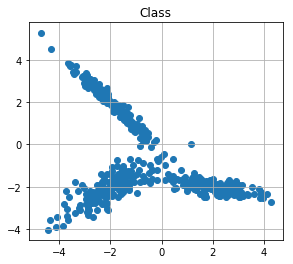

In [33]:
plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
plt.title("Class")
plt.scatter(X[:,0], X[:,1])
plt.grid(True)

plt.show()

In [34]:
kM_cl = KMeans(n_clusters=3, max_iter=300, init="random", random_state=10, n_init=1)
kM_cl.fit(X)
y_pred = kM_cl.predict(X)

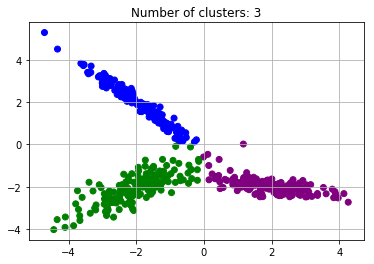

In [35]:
plt.title("Number of clusters: 3")
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=clrMap)
plt.grid(True)
plt.show()

In [36]:
X, y = datasets.make_blobs(n_samples=n, random_state=1000)

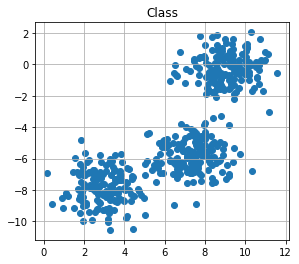

In [37]:
plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
plt.title("Class")
plt.scatter(X[:,0], X[:,1])
plt.grid(True)

plt.show()

In [38]:
kM_cl = KMeans(n_clusters=3, max_iter=300, init="random", random_state=10, n_init=1)
kM_cl.fit(X)
y_pred = kM_cl.predict(X)

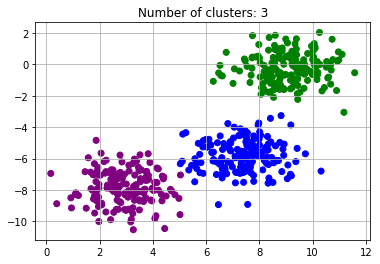

In [39]:
plt.title("Number of clusters: 3")
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=clrMap)
plt.grid(True)
plt.show()

In [40]:
X, y = datasets.make_moons(n_samples=n, noise=0.1)

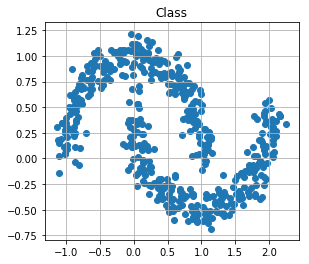

In [41]:
plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
plt.title("Class")
plt.scatter(X[:,0], X[:,1])
plt.grid(True)

plt.show()

In [42]:
kM_cl = KMeans(n_clusters=2, max_iter=300, init="random", random_state=10, n_init=1)
kM_cl.fit(X)
y_pred = kM_cl.predict(X)

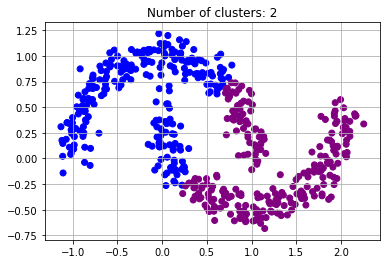

In [43]:
plt.title("Number of clusters: 2")
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=clrMap)
plt.grid(True)
plt.show()

In [44]:
X, y = datasets.make_circles(n_samples=n, factor=0.1, noise=0.1)

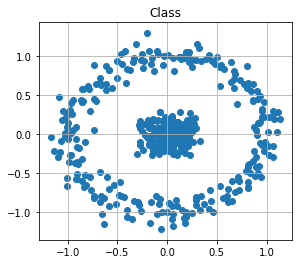

In [45]:
plt.figure(figsize=[10, 4])

plt.subplot(1,2,1)
plt.title("Class")
plt.scatter(X[:,0], X[:,1])
plt.grid(True)

plt.show()

In [46]:
kM_cl = KMeans(n_clusters=2, max_iter=300, init="random", random_state=10, n_init=1)
kM_cl.fit(X)
y_pred = kM_cl.predict(X)

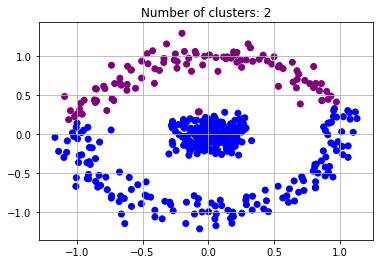

In [47]:
plt.title("Number of clusters: 2")
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=clrMap)
plt.grid(True)
plt.show()

<a name="3"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">3. Иерархическая кластеризация</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html">AgglomerativeClustering</a>

In [48]:
n = 1000
random_state = 100
X, y = make_blobs(n_samples=n, centers=3, cluster_std=1, center_box=(-5, 5), random_state=random_state)

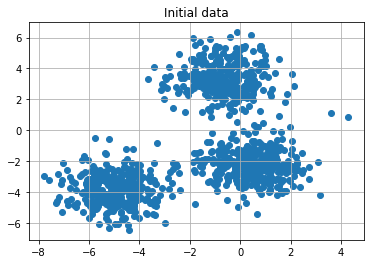

In [49]:
plt.title("Initial data")
plt.scatter(X[:, 0], X[:, 1])
plt.grid(True)
plt.show()

In [50]:
aggl_avr = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")

In [51]:
y_pred = aggl_avr.fit_predict(X)

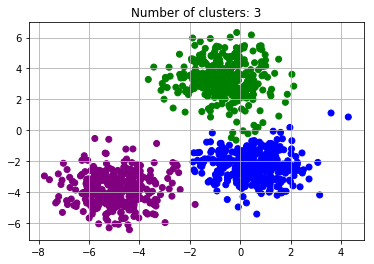

In [52]:
plt.title("Number of clusters: 3")
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=clrMap)
plt.grid(True)
plt.show()

<p>Примеры</p>

In [53]:
X_class, y_class = datasets.make_classification(n_samples=n, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=2,
                           random_state=1234)
X_blob, y_blob = datasets.make_blobs(n_samples=n, random_state=1000)
X_moon, y_moon = datasets.make_moons(n_samples=n, noise=0.1)
X_circle, y_circle = datasets.make_circles(n_samples=n, factor=0.1, noise=0.1)
X_rand, y_rand = np.random.rand(n, 2), None

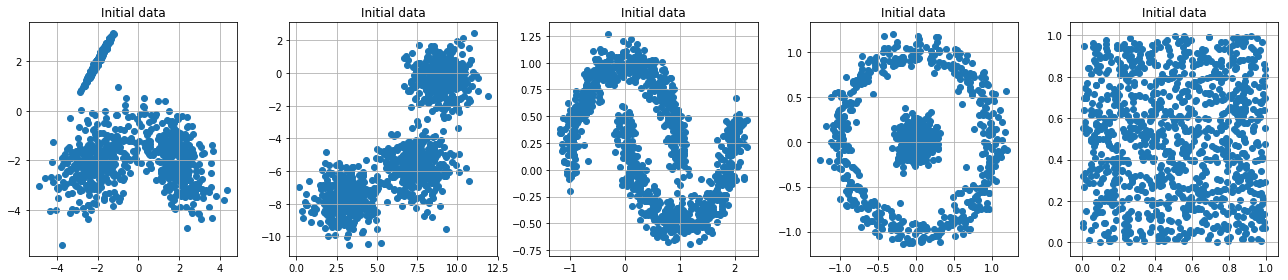

In [54]:
plt.figure(figsize=[18, 4])

plt.subplot(1,5,1)
plt.title("Initial data")
plt.scatter(X_class[:, 0], X_class[:, 1])
plt.grid(True)

plt.subplot(1,5,2)
plt.title("Initial data")
plt.scatter(X_blob[:, 0], X_blob[:, 1])
plt.grid(True)

plt.subplot(1,5,3)
plt.title("Initial data")
plt.scatter(X_moon[:, 0], X_moon[:, 1])
plt.grid(True)

plt.subplot(1,5,4)
plt.title("Initial data")
plt.scatter(X_circle[:, 0], X_circle[:, 1])
plt.grid(True)

plt.subplot(1,5,5)
plt.title("Initial data")
plt.scatter(X_rand[:, 0], X_rand[:, 1])
plt.grid(True)

plt.tight_layout()

plt.show()

In [55]:
aggl_avr = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")

y_pred_class = aggl_avr.fit_predict(X_class)
y_pred_blob = aggl_avr.fit_predict(X_blob)

aggl_avr_2 = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="average")
y_pred_moon = aggl_avr_2.fit_predict(X_moon)

y_pred_circle = aggl_avr_2.fit_predict(X_circle)
y_pred_rand = aggl_avr_2.fit_predict(X_rand)

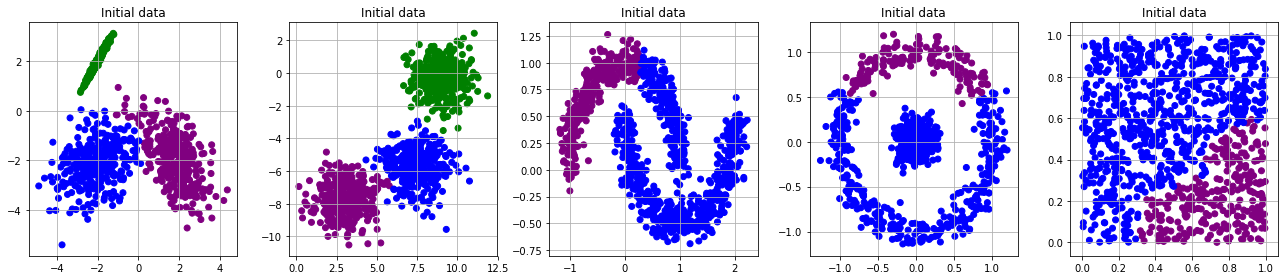

In [56]:
plt.figure(figsize=[18, 4])

plt.subplot(1,5,1)
plt.title("Initial data")
plt.scatter(X_class[:, 0], X_class[:, 1], c=y_pred_class, cmap=clrMap)
plt.grid(True)

plt.subplot(1,5,2)
plt.title("Initial data")
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_pred_blob, cmap=clrMap)
plt.grid(True)

plt.subplot(1,5,3)
plt.title("Initial data")
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_pred_moon, cmap=clrMap)
plt.grid(True)

plt.subplot(1,5,4)
plt.title("Initial data")
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_pred_circle, cmap=clrMap)
plt.grid(True)

plt.subplot(1,5,5)
plt.title("Initial data")
plt.scatter(X_rand[:, 0], X_rand[:, 1], c=y_pred_rand, cmap=clrMap)
plt.grid(True)

plt.tight_layout()

plt.show()

<a name="4"></a>
<div style="display:table; width:100%; padding-top:10px; padding-bottom:10px; border-bottom:1px solid lightgrey">
    <div style="display:table-row">
        <div style="display:table-cell; width:80%; font-size:14pt; font-weight:bold">4. Кластеризция по плотности</div>
    	<div style="display:table-cell; width:20%; text-align:center; background-color:whitesmoke; border:1px solid lightgrey"><a href="#0">К содержанию</a></div>
    </div>
</div>

<a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html">DBSCAN</a>

In [57]:
n = 1000
random_state = 100
X, y = make_blobs(n_samples=n, centers=3, cluster_std=1, center_box=(-5, 5), random_state=random_state)

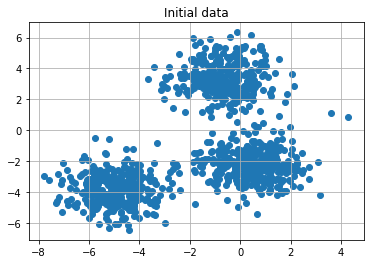

In [58]:
plt.title("Initial data")
plt.scatter(X[:, 0], X[:, 1])
plt.grid(True)
plt.show()

In [59]:
dbscan = DBSCAN(min_samples=4, eps=0.5, metric="euclidean")

In [60]:
y_pred = dbscan.fit_predict(X)

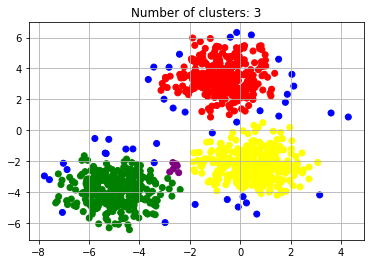

In [61]:
plt.title("Number of clusters: 3")
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=clrMap)
plt.grid(True)
plt.show()

<p>Пример</p>

In [62]:
X_class, y_class = datasets.make_classification(n_samples=n, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, n_classes=3, class_sep=2,
                           random_state=1234)
X_blob, y_blob = datasets.make_blobs(n_samples=n, random_state=1000)
X_moon, y_moon = datasets.make_moons(n_samples=n, noise=0.1)
X_circle, y_circle = datasets.make_circles(n_samples=n, factor=0.1, noise=0.1)
X_rand, y_rand = np.random.rand(n, 2), None

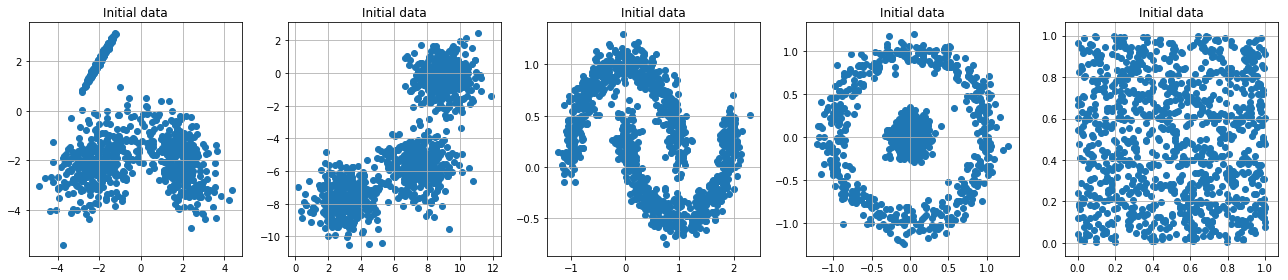

In [63]:
plt.figure(figsize=[18, 4])

plt.subplot(1,5,1)
plt.title("Initial data")
plt.scatter(X_class[:, 0], X_class[:, 1])
plt.grid(True)

plt.subplot(1,5,2)
plt.title("Initial data")
plt.scatter(X_blob[:, 0], X_blob[:, 1])
plt.grid(True)

plt.subplot(1,5,3)
plt.title("Initial data")
plt.scatter(X_moon[:, 0], X_moon[:, 1])
plt.grid(True)

plt.subplot(1,5,4)
plt.title("Initial data")
plt.scatter(X_circle[:, 0], X_circle[:, 1])
plt.grid(True)

plt.subplot(1,5,5)
plt.title("Initial data")
plt.scatter(X_rand[:, 0], X_rand[:, 1])
plt.grid(True)

plt.tight_layout()

plt.show()

In [64]:
dbscan_avr = DBSCAN(min_samples=15, eps=0.6, metric="euclidean")

y_pred_class = dbscan_avr.fit_predict(X_class)
y_pred_blob = dbscan_avr.fit_predict(X_blob)

dbscan_avr_2 = DBSCAN(min_samples=20, eps=0.2, metric="euclidean")
y_pred_moon = dbscan_avr_2.fit_predict(X_moon)

y_pred_circle = dbscan_avr_2.fit_predict(X_circle)
y_pred_rand = dbscan_avr_2.fit_predict(X_rand)

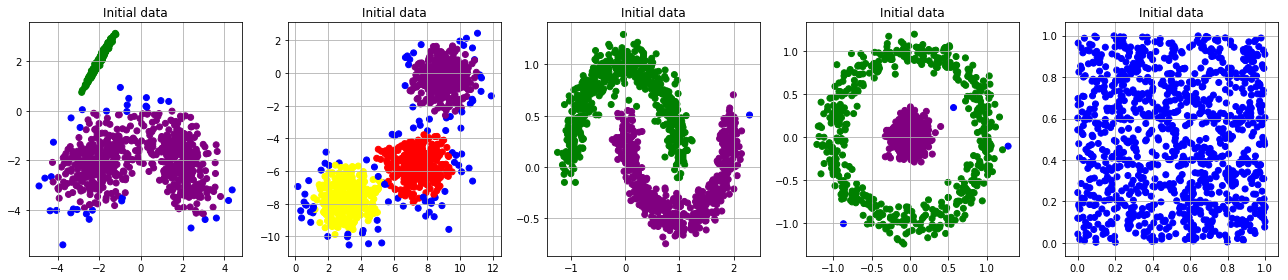

In [65]:
plt.figure(figsize=[18, 4])

plt.subplot(1,5,1)
plt.title("Initial data")
plt.scatter(X_class[:, 0], X_class[:, 1], c=y_pred_class, cmap=clrMap)
plt.grid(True)

plt.subplot(1,5,2)
plt.title("Initial data")
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_pred_blob, cmap=clrMap)
plt.grid(True)

plt.subplot(1,5,3)
plt.title("Initial data")
plt.scatter(X_moon[:, 0], X_moon[:, 1], c=y_pred_moon, cmap=clrMap)
plt.grid(True)

plt.subplot(1,5,4)
plt.title("Initial data")
plt.scatter(X_circle[:, 0], X_circle[:, 1], c=y_pred_circle, cmap=clrMap)
plt.grid(True)

plt.subplot(1,5,5)
plt.title("Initial data")
plt.scatter(X_rand[:, 0], X_rand[:, 1], c=y_pred_rand, cmap=clrMap)
plt.grid(True)

plt.tight_layout()

plt.show()